## Praca domowa 4

#### Autor: Mateusz Borowski

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [2]:
df.set_index("Rank", inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [3]:
# a)
df[(df["Year"] > 2015) & (df["Publisher"] == "Nintendo") & (df["NA_Sales"] < df["EU_Sales"])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [4]:
# b)
df[df["Year"] == 2010].groupby("Genre")["Global_Sales"].sum().idxmax()

'Action'

In [5]:
# c)
df_agg = df.groupby("Genre").agg(
    EU_Sales_mean = pd.NamedAgg(column="EU_Sales", aggfunc=np.mean),
    JP_Sales_mean = pd.NamedAgg(column="JP_Sales", aggfunc=np.mean),
)

df_agg[df_agg["JP_Sales_mean"] > df_agg["EU_Sales_mean"]] \
    .drop(columns=["EU_Sales_mean"]) \
    .reset_index() \
    .sort_values(by="JP_Sales_mean", ascending=False) \
    .rename(columns={"Genre": "Typ Gry", "JP_Sales_mean": "Średnia sprzedaż w Japonii"})

,Typ Gry,Średnia sprzedaż w Japonii
1,Role-Playing,0.238293
0,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [6]:
from IPython.display import Image


## 1) Orginalny wykres:
Źródło: [„Wybrane aspekty rynku pracy w Polsce. Aktywność ekonomiczna ludności przed i w czasie pandemii COVID-19”](https://stat.gov.pl/obszary-tematyczne/rynek-pracy/zasady-metodyczne-rocznik-pracy/wybrane-aspekty-rynku-pracy-w-polsce-aktywnosc-ekonomiczna-ludnosci-przed-i-w-czasie-pandemii-covid-19,11,1.html)

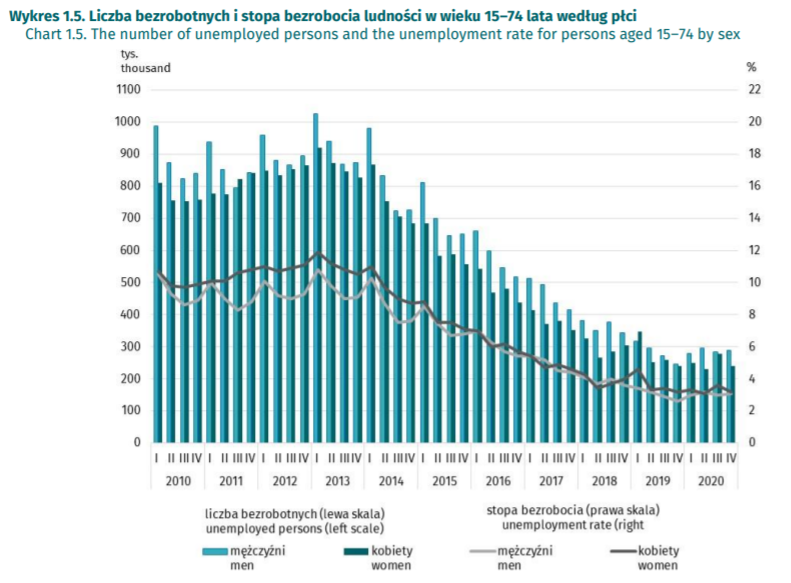

In [7]:
Image(filename="orginal.png")

## 2) Wykres z HW2
[Praca domowa w której się pojawił](https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/BorowskiMateusz)

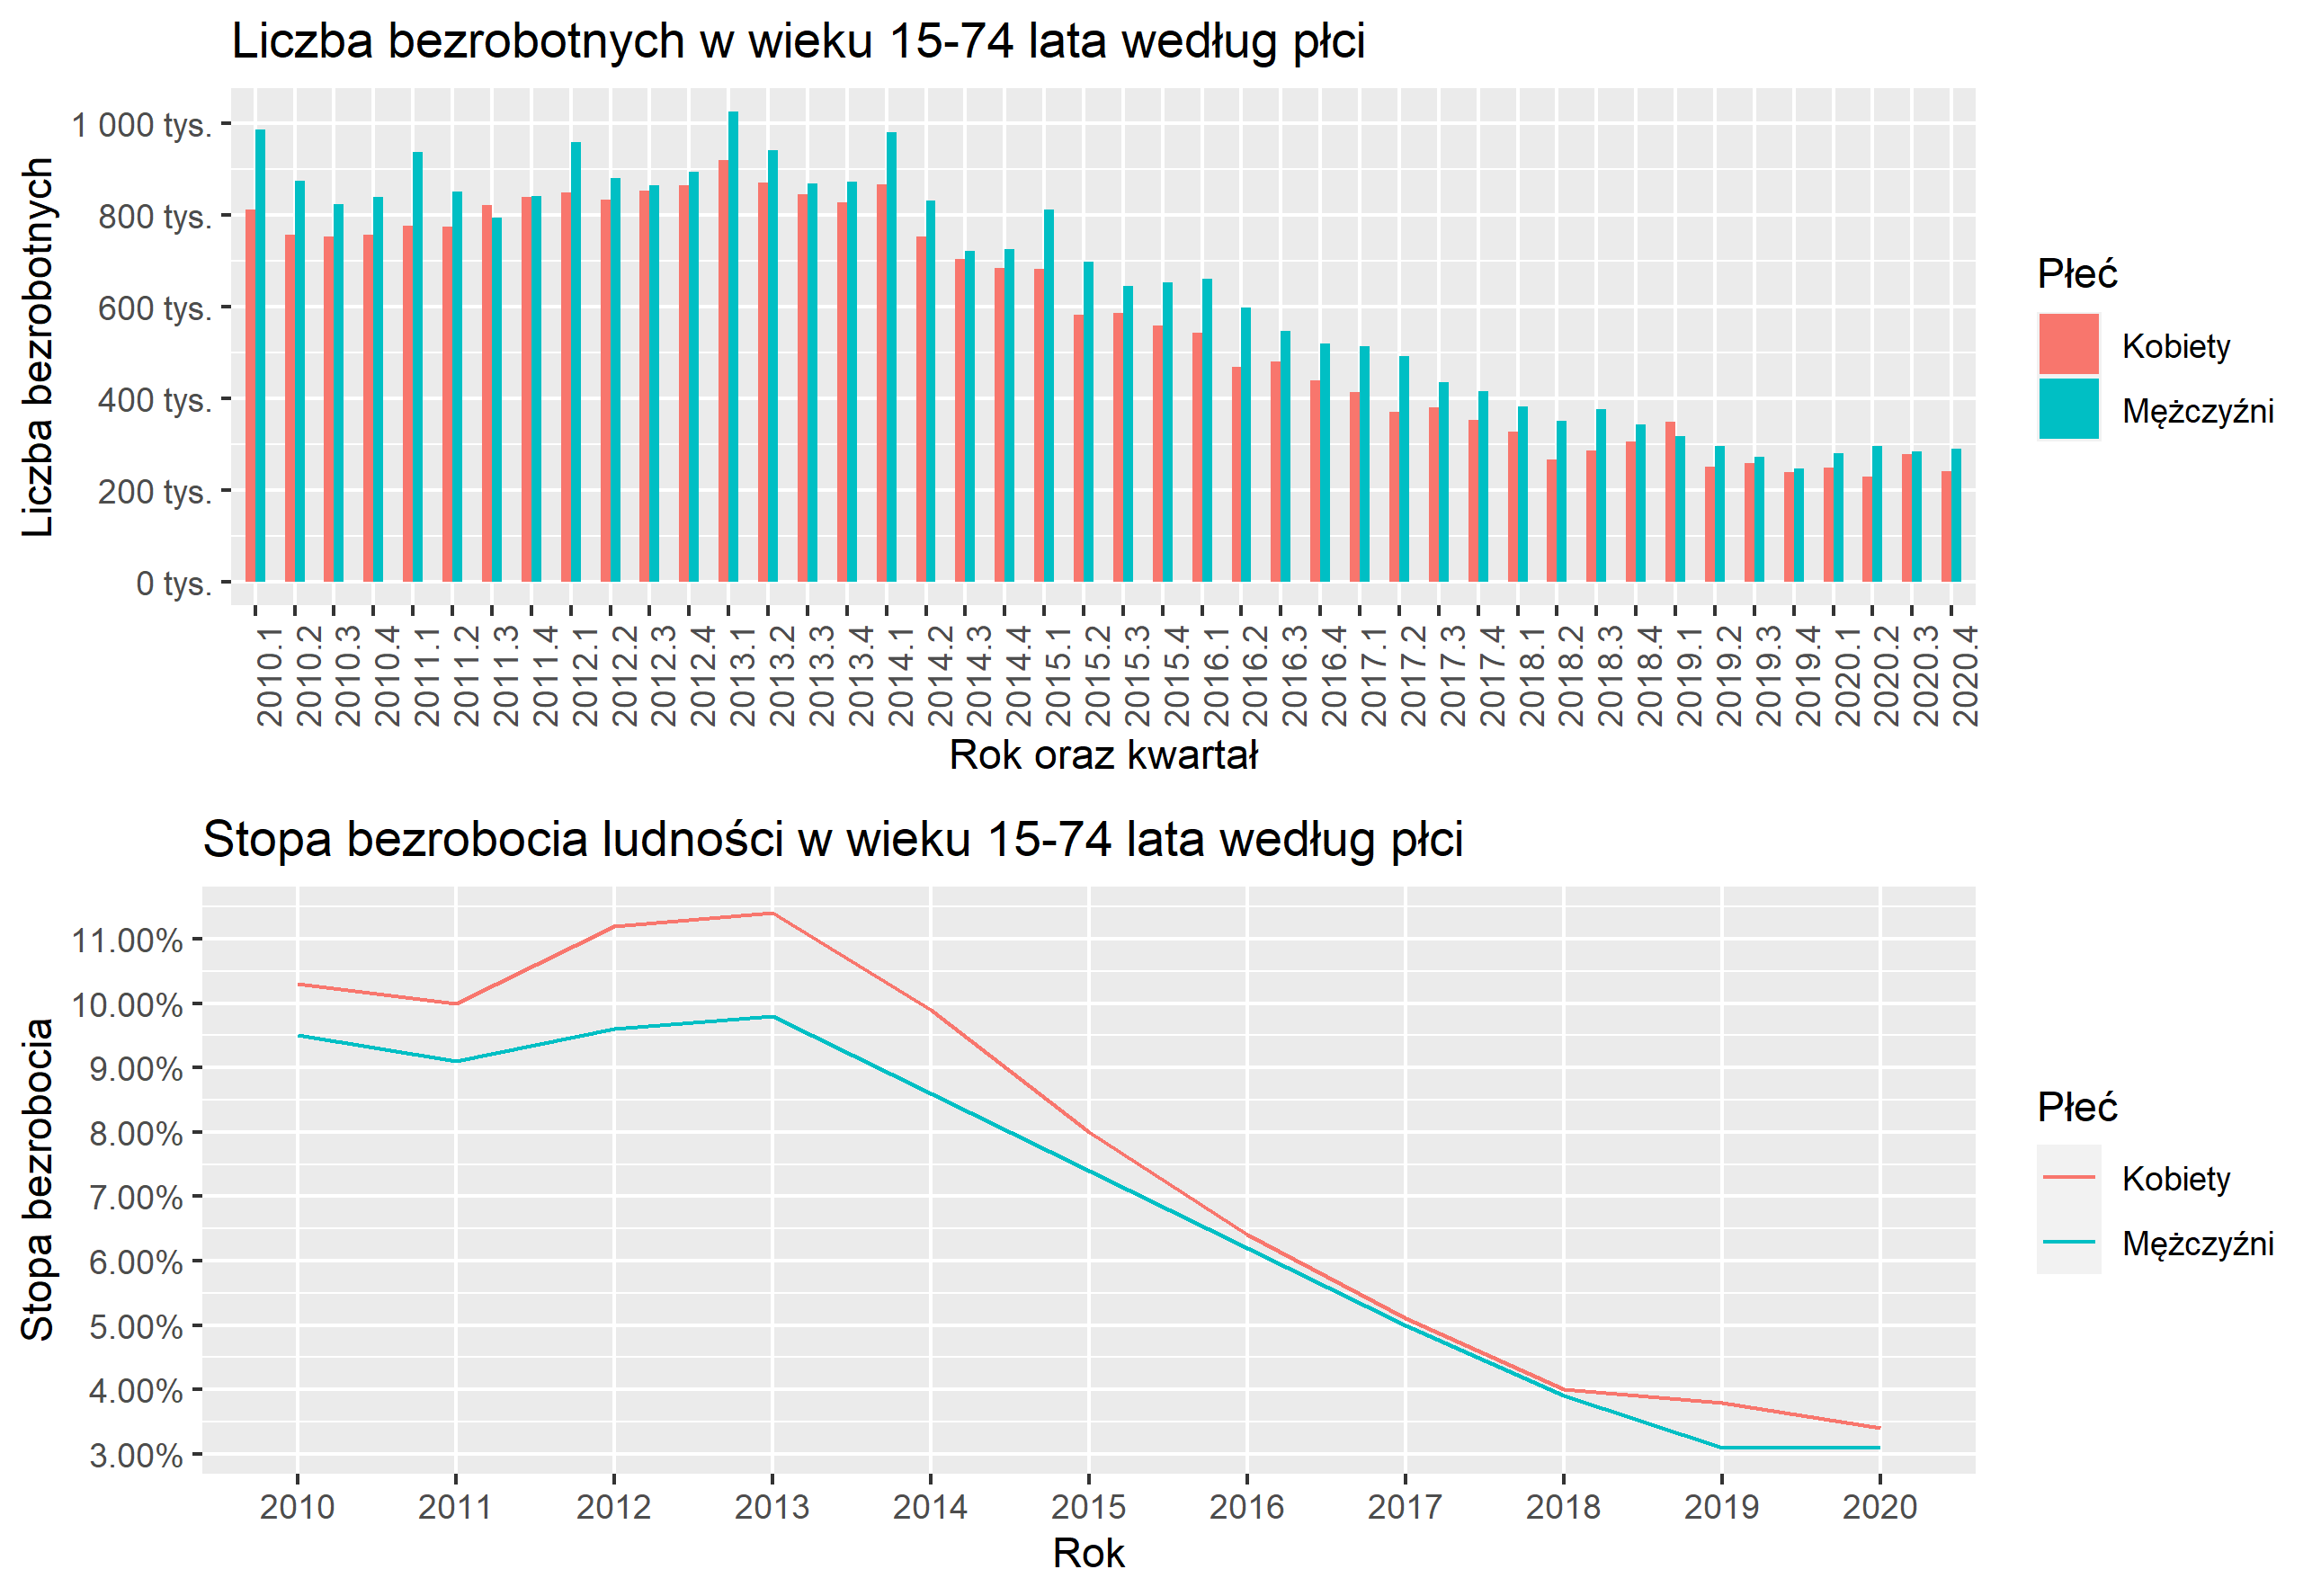

In [8]:
Image(filename="stopa_i_liczba_bezrobotnych.png")

## 3) Poprawiony wykres w Pythonie

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set(rc = {'figure.figsize': (20,20)})

In [10]:
liczba_bezrobotnych = pd.read_csv("liczba_bezrobotnych.csv", delimiter=';')
stopa_bezrobocia = pd.read_csv("stopa_bezrobocia.csv", delimiter=';')

In [11]:
def get_quarter_in_roman(quater):
    if quater == "1":
        return "I"
    if quater == "2":
        return "II"
    if quater == "3":
        return "III"
    if quater == "4":
        return "IV"

In [12]:
lb = liczba_bezrobotnych.melt(id_vars="płeć")
lb.sort_values("variable", inplace=True)
splited = lb["variable"].str.split(".")
lb["variable"] = splited.apply(lambda x: f"{x[0]} {get_quarter_in_roman(x[1])}")
lb_m = lb[lb["płeć"] == "mężczyźni"]
lb_k = lb[lb["płeć"] == "kobiety"]

In [13]:
sb = stopa_bezrobocia.melt(id_vars="płeć")
sb_m = sb[sb["płeć"] == "mężczyźni"]
sb_k = sb[sb["płeć"] == "kobiety"]

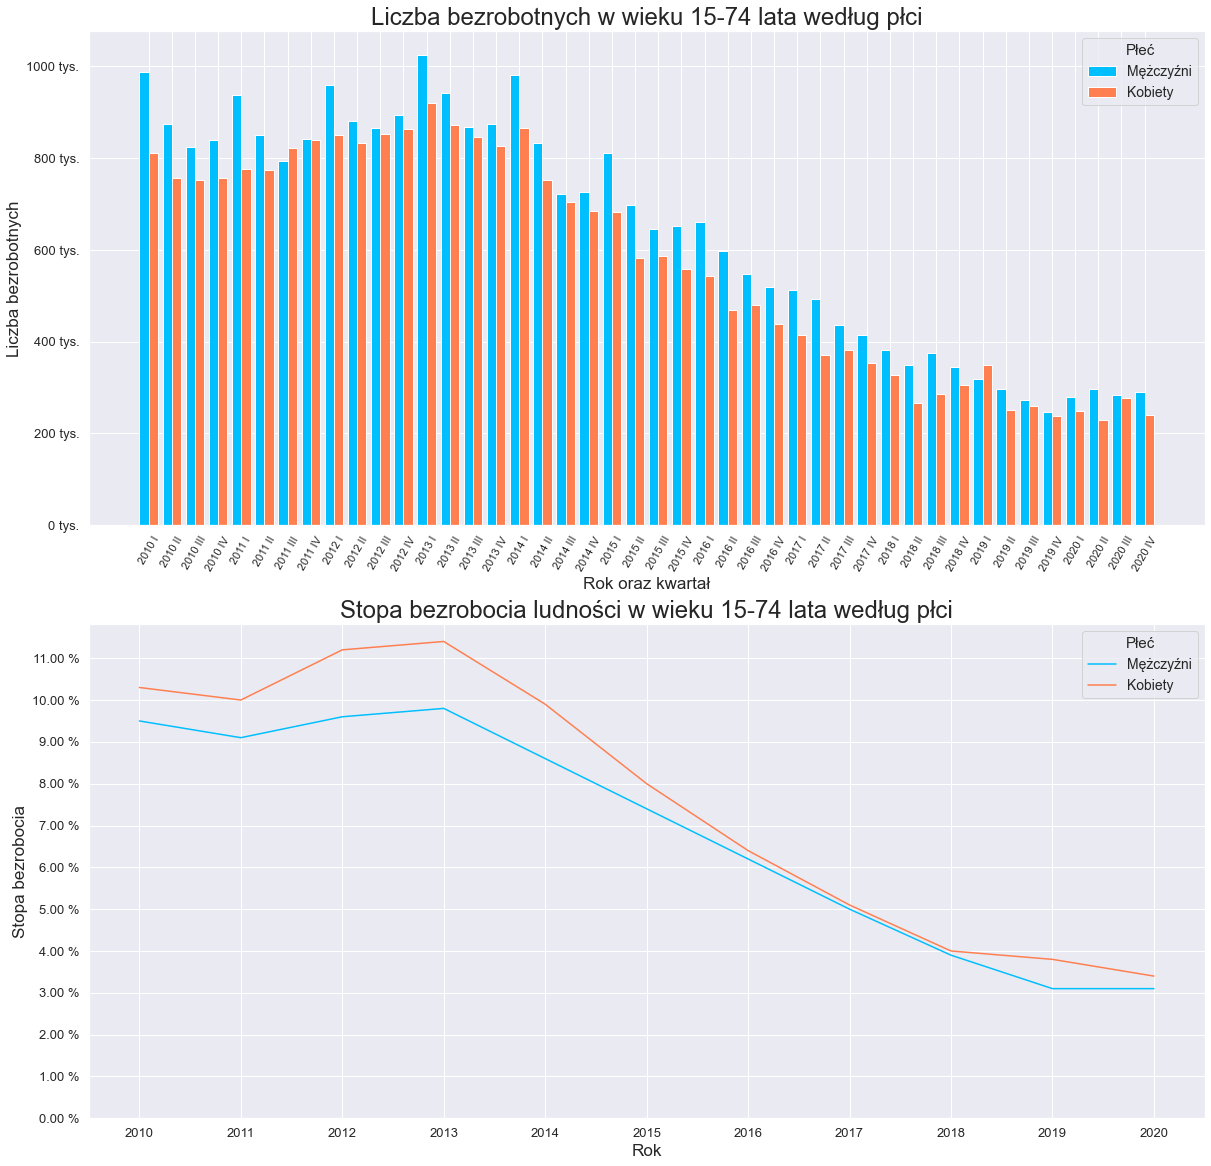

In [14]:
fig, ax = plt.subplots(2, 1)

barWidth = 0.4
n = lb_m.shape[0]
X_axis = np.arange(n)
ax[0].bar(X_axis - barWidth/2, lb_m["value"], label="Mężczyźni", width=barWidth, color="deepskyblue")
ax[0].bar(X_axis + barWidth/2, lb_k["value"], label="Kobiety", width=barWidth, color="coral")
ax[0].set_xticks(X_axis)
ax[0].set_xticklabels(lb_m["variable"], rotation=60)
ax[0].tick_params(axis='y', labelsize=13)
ax[0].set_xlabel("Rok oraz kwartał", fontsize=17)
ax[0].set_ylabel("Liczba bezrobotnych", fontsize=17)
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%d tys.'))
ax[0].set_title("Liczba bezrobotnych w wieku 15-74 lata według płci", fontsize=24)
ax[0].legend(title="Płeć", fontsize=14, title_fontsize=15)

ax[1].plot(sb_m["variable"], sb_m["value"], color="deepskyblue", label="Mężczyźni")
ax[1].plot(sb_k["variable"], sb_k["value"], color="coral", label="Kobiety")
ax[1].set_xlabel("Rok", fontsize=17)
ax[1].set_ylabel("Stopa bezrobocia", fontsize=17)
ax[1].set_yticks(np.arange(0, 12, step=1))
ax[1].tick_params(labelsize=13)
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%0.2f %%'))
ax[1].set_title("Stopa bezrobocia ludności w wieku 15-74 lata według płci", fontsize=24)
ax[1].legend(title="Płeć", fontsize=14, title_fontsize=15)

plt.show()

## 4) Uzasadnienie, dlaczego wykres w Pythonie jest lepszy od pozostałych

Wykres wykonany w Pythonie, podobnie jak wykres w R, jest bardziej czytelny, dzięki rozbiciu jednego wykresu na dwa osobne, ponieważ znika problem z odczytaniem danych spowodowany nachodzącymi na siebie wykresami. Odczytanie wartości również jest teraz łatwiejsze, gdyż każdy wykres ma tylko jedną oś Y. Kolory na wykresach stworzonych w R i Pythonie są lepiej dobrane, dzięki czemu nie zlewają się tak bardzo jak na orginalnej wizualizacji.

Jest jednak parę rzeczy, które na wykresie wykonanym w Pythonie zostały zrobione lepiej niż na wykresie w R. Po pierwsze wartości na osi X na górnym wykresie zostały pochylone, dzięki czemu stały się bardziej czytelne. Co więcej kwartały zostały zapisane liczbami rzymskimi, przez co łatwiej jest nam je odczytać, gdyż jesteśmy do takiego zapisu przyzwyczajeni. Słupki są teraz nieco grubsze, co również ułatwia odczyt danych, jednak nie są na tyle grube, żeby zlewały się ze sobą. Oś Y na dolnym wykresie zaczyna się teraz od 0, dzięki czemu ryzyko wprowadzenia w błąd osoby korzystającej z wykresu zmniejsza się.